# **Fingerprint dataset blood group detection**

#### **1. Importing the libs :**

In [12]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#### **2. loading the data set Method 1:**

In [35]:
# define the resize shape :
image_height = 40
image_width = 40
batch_size = 32

In [54]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\hp\Downloads\data_finger\dataset_blood_group', # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.4,
    subset = "training"
)

ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\hp\Downloads\data_finger\dataset_blood_group', # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.4,
    subset = "validation"
)

Found 6000 files belonging to 8 classes.
Using 3600 files for training.
Found 6000 files belonging to 8 classes.
Using 2400 files for validation.


In [55]:
# devide the val data set into val and test data set 
val_batches = tf.data.experimental.cardinality(ds_val)
ds_test = ds_val.take(val_batches // 2)
ds_validation = ds_val.skip(val_batches // 2)

In [56]:
# displaying the shapes :
print('the number of batches in train set :', tf.data.experimental.cardinality(ds_train))
print('the number of batches in validation set :', tf.data.experimental.cardinality(ds_validation))
print('the number of batches in test set :', tf.data.experimental.cardinality(ds_test))

the number of batches in train set : tf.Tensor(113, shape=(), dtype=int64)
the number of batches in validation set : tf.Tensor(38, shape=(), dtype=int64)
the number of batches in test set : tf.Tensor(37, shape=(), dtype=int64)


In [57]:
# displaying the shapes of images:
for img, lab in ds_train.take(1):
    image = img[0]
    label = lab[0]
    print('the shape of the image :', image.shape)
    print('the label of the image :', image.shape)

the shape of the image : (40, 40, 3)
the label of the image : (40, 40, 3)


In [58]:
# displaying the range of labeles :
print('the labels are :', ds_train.class_names)

the labels are : ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [59]:
# image visualisation :

# initialization of a dictionary that contient 10 images by class 
images_by_class = {}

for images, labels in ds_train :
    for image, label in zip(images, labels):
        label = tf.argmax(label).numpy()
        if label not in images_by_class:
            images_by_class[label] = []
        if len(images_by_class[label]) < 10 :
            images_by_class[label].append(image.numpy())

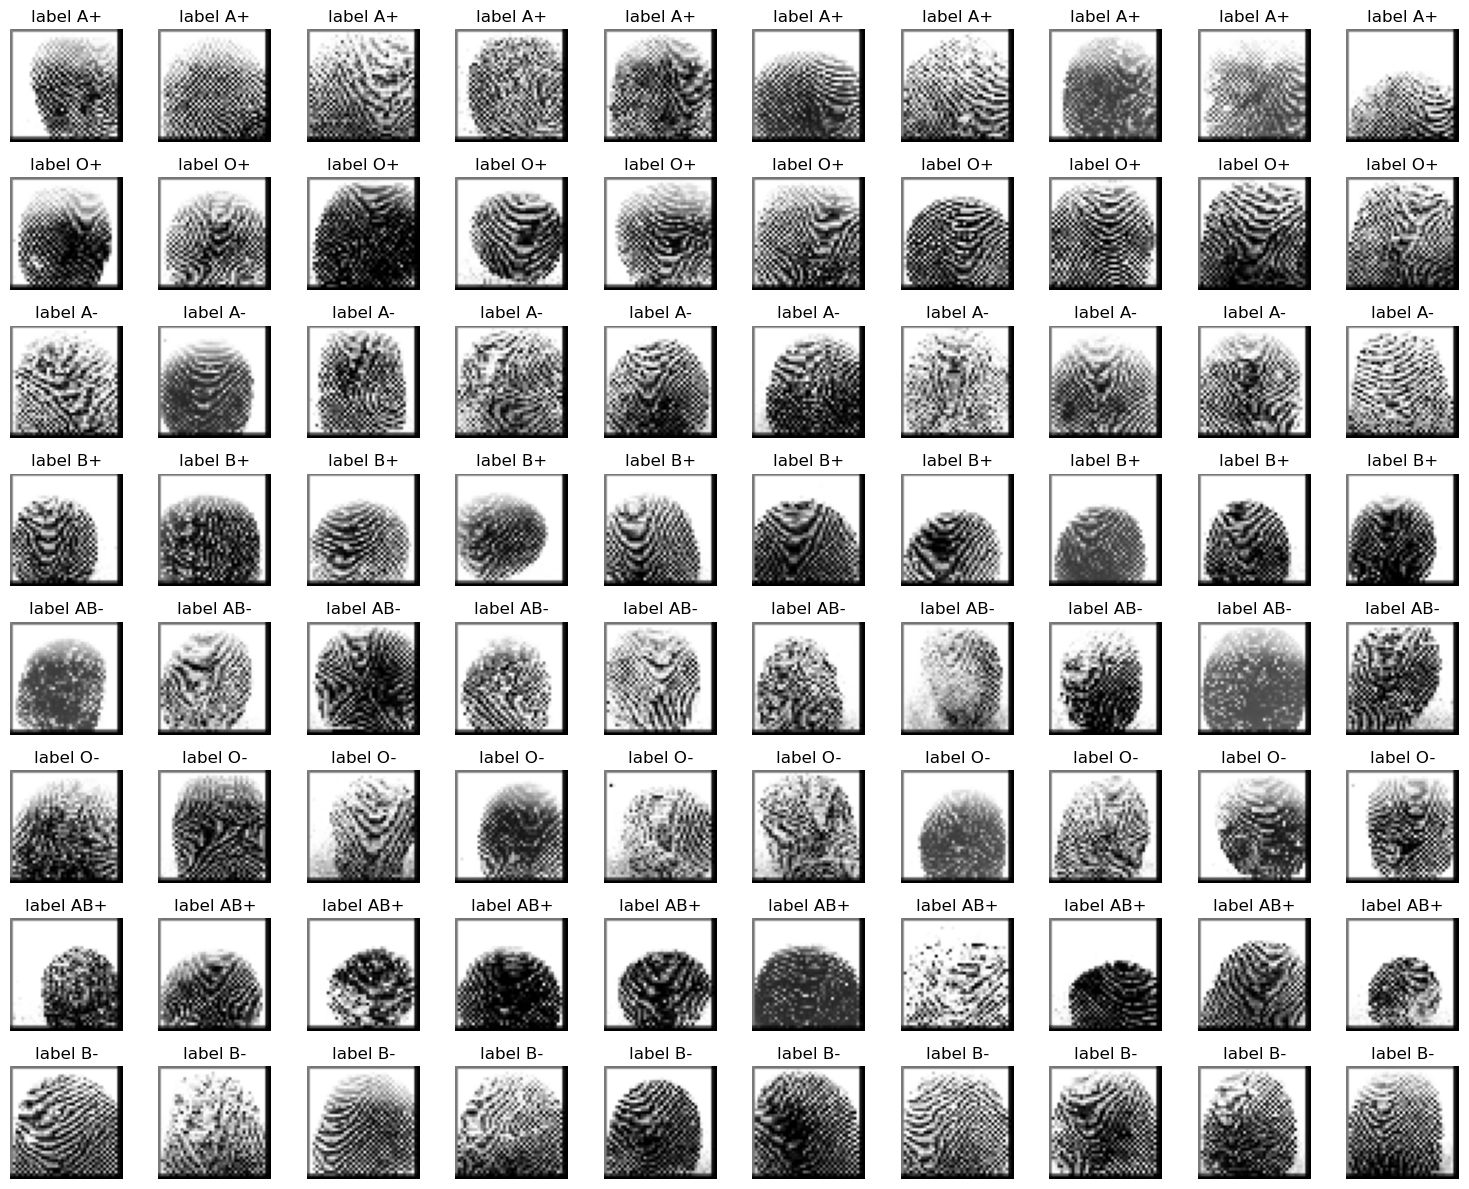

In [60]:
# create the visuals :
total_images = len(images_by_class) * 10 
cols = 10
rows = (total_images // cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
index = 0

for label, images in images_by_class.items():
    for image in images:
        ax = axes.flat[index]
        ax.imshow(image.astype("uint8"))
        ax.axis('off')
        ax.set_title(f"label {ds_train.class_names[label]}")
        index += 1

plt.tight_layout()
plt.show()